In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.groupby.generic import ScalarResult
from sklearn.preprocessing import RobustScaler
from sklearn import svm
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# Constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1,L2,L3,L4]
FEATURES = [f'feature_{i}' for i in range(1,769)]


In [3]:
# Load the training and validation datasets
train_data = pd.read_csv('/kaggle/input/speech-based-classification-layer-9/train.csv').dropna()
valid_data = pd.read_csv('/kaggle/input/speech-based-classification-layer-9/valid.csv').dropna()
test_data = pd.read_csv('/kaggle/input/speech-based-classification-layer-9/test.csv')

In [ ]:
train_data.head()

In [ ]:
valid_data.head()

In [ ]:
test_data.head()

In [4]:
train_data.isnull().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_768    0
label_1        0
label_2        0
label_3        0
label_4        0
Length: 772, dtype: int64

In [6]:
# Separate features and labels

x_train = train_data.drop(columns=['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = train_data[['label_1', 'label_2', 'label_3', 'label_4']]
x_valid = valid_data.drop(columns=['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_valid = valid_data[['label_1', 'label_2', 'label_3', 'label_4']]
x_test = test_data.drop(columns=['ID'], axis=1)


# **Hyperparameter Tuning - Random Grid Search**

In [7]:
def randomizedSearch(model,x_train,y_train):
    parameter_distributions = {
        'C': [10,100,1000],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': [1,0.1,0.01],
        'degree':[2,3,4]
    }
    randomized_search = RandomizedSearchCV(
          estimator=model,
          param_distributions=parameter_distributions,
          scoring='accuracy',
          cv=2,
          verbose=1,
          n_jobs=-1,
          n_iter=5
      )

    randomized_search.fit(x_train, y_train)

    best_model_label = randomized_search.best_estimator_
    best_accuracy_label = randomized_search.best_score_
    best_param = randomized_search.best_params_

    print(best_param)
    print(best_accuracy_label)

# **Label 1**

Text(0, 0.5, 'Count')

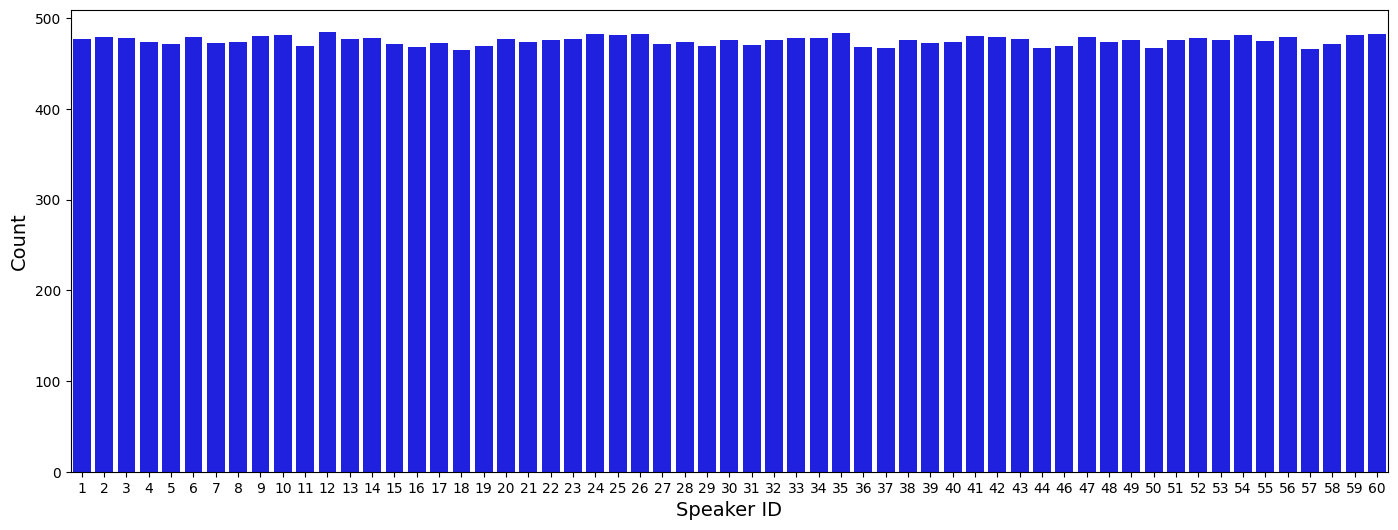

In [33]:
plt.figure(figsize=(17, 6))
sn.countplot(data=y_train, x='label_1',color = 'blue')
plt.xlabel('Speaker ID',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [ ]:
best_model_label_1 = svm.SVC(C=10, gamma=0.1, kernel='linear',degree=2)
best_model_label_1.fit(x_train,y_train[L1])

In [ ]:
label_1_predict_valid_before_feature_engineering = best_model_label_1.predict(x_valid)
label_1_predict_Test_before_feature_engineering = best_model_label_1.predict(x_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_valid[L1],label_1_predict_valid_before_feature_engineering))

In [34]:
pca = PCA(n_components=0.96,svd_solver='full')
x_traing_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

x_traing_trf = pd.DataFrame(x_traing_pca)
x_valid_trf = pd.DataFrame(x_valid_pca)
x_test_trf = pd.DataFrame(x_test_pca)

In [ ]:
accuracy_svc = cross_val_score(svm.SVC(C=10, gamma=0.1, kernel='linear',degree=2), x_train, y_train[L1], cv=3).mean()

In [35]:
best_model_label_1 = svm.SVC(C=10, gamma=0.1, kernel='linear',degree=2)
best_model_label_1.fit(x_traing_trf,y_train[L1])

label_1_predict_valid_after_feature_engineering = best_model_label_1.predict(x_valid_trf)
label_1_predict_test_after_feature_engineering = best_model_label_1.predict(x_test_trf)
print("Accuracy :",metrics.accuracy_score(y_valid[L1],label_1_predict_valid_after_feature_engineering))

Accuracy : 0.9538043478260869


In [12]:
# **Hyperparameter Tuning - Random Grid Search**
randomizedSearch(svm.SVC(),x_traing_pca,y_train[L1])

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'C': 10}
0.9232168330955777


 # **Label 2**

Text(0, 0.5, 'Count')

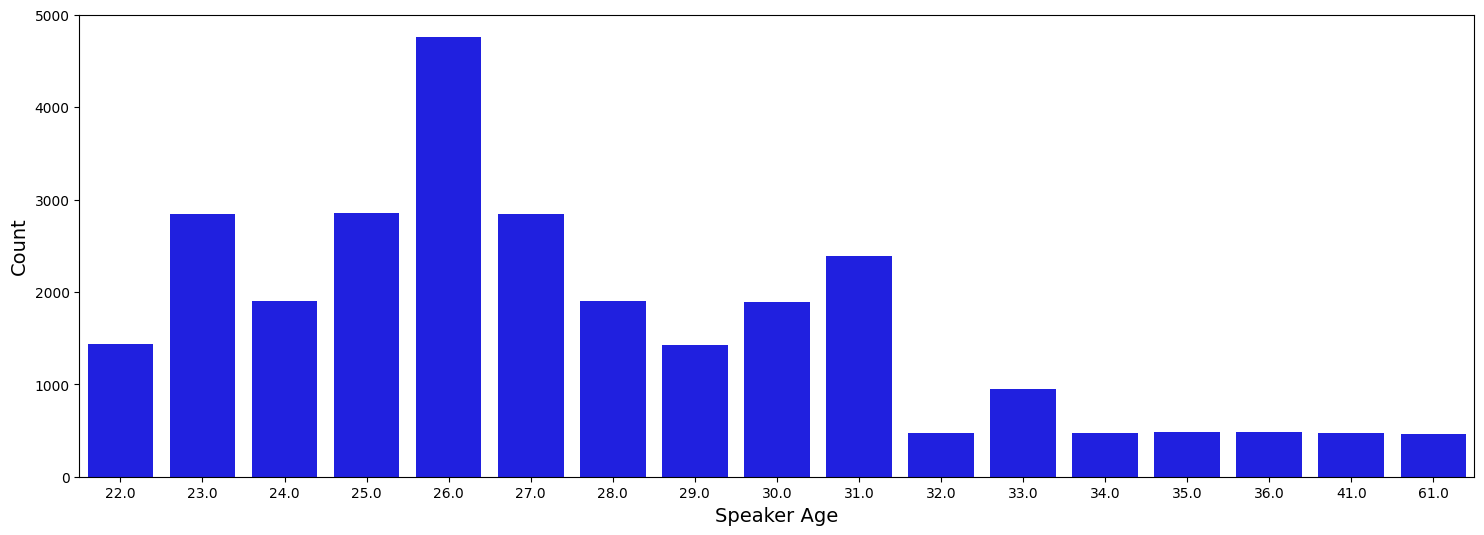

In [8]:
plt.figure(figsize=(18, 6))
sn.countplot(data=y_train, x='label_2',color = 'blue')
plt.xlabel('Speaker Age',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(np.array(x_train), y_train[L2])
label_2_predict_valid_before_feature_engineering = knn.predict(np.array(x_valid))

In [ ]:
print("Accuracy :",accuracy_score(y_valid[L2],label_2_predict_valid_before_feature_engineering))

In [10]:
def correlation(dataset, threshold=0.7):
    col_correlation = set()
    correlation_matrix = dataset.corr()
    for i in range (len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                colname = correlation_matrix.columns[i]
                col_correlation.add(colname)
    return col_correlation

In [11]:
corr_features = correlation(x_train)
x_train = x_train.drop(columns=list(corr_features))
x_valid= x_valid.drop(columns=list(corr_features))
x_test = x_test.drop(columns=list(corr_features))

In [12]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [13]:
n_components = 0.96
pca = PCA(n_components=n_components)

x_train_pca = pca.fit_transform(x_train_scaled)
x_valid_pca = pca.transform(x_val_scaled)
x_test_pca = pca.transform(x_test_scaled)

x_traing_trf = pd.DataFrame(x_train_pca)
x_valid_trf = pd.DataFrame(x_valid_pca)
x_test_trf = pd.DataFrame(x_test_pca)

In [15]:
# best_model_label_2 = svm.SVC(C=100,kernel='poly',gamma=0.01,degree= 3)
best_model_label_2 = svm.SVC(C=10,kernel='poly',gamma=1,degree= 4)
best_model_label_2.fit(x_train_pca,y_train[L2])

SVC(C=10, degree=4, gamma=1, kernel='poly')

In [ ]:
label_2_predict_valid_before_feature_engineering = best_model_label_2.predict(x_valid)
label_2_predict_Test_before_feature_engineering = best_model_label_2.predict(x_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_valid[L2],label_2_predict_valid_before_feature_engineering))

In [ ]:
# accuracy_svc = cross_val_score(svm.SVC(C=10, gamma=0.01, kernel='linear',class_weight='balanced'), x_train, y_train[L1], cv=3).mean()
accuracy_svc = cross_val_score(svm.SVC(C=10, gamma=1, kernel='poly',degree = 4), x_train, y_train[L1], cv=3).mean()

In [16]:
# best_model_label_2 = svm.SVC(C=10,kernel='poly',gamma=1,degree= 4)
best_model_label_2.fit(x_traing_trf,y_train[L2])

label_2_predict_valid_after_feature_engineering = best_model_label_2.predict(x_valid_trf)
label_2_predict_test_after_feature_engineering = best_model_label_2.predict(x_test_trf)
print("Accuracy :",metrics.accuracy_score(y_valid[L2],label_2_predict_valid_after_feature_engineering))

Accuracy : 0.9320652173913043


In [19]:
# Hyperparameter Tuning - Random Grid Search
randomizedSearch(svm.SVC(),x_train_pca,y_train[L2])

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'poly', 'gamma': 1, 'degree': 4, 'C': 10}
0.26576319543509275


# **Label 3**

Text(0, 0.5, 'Count')

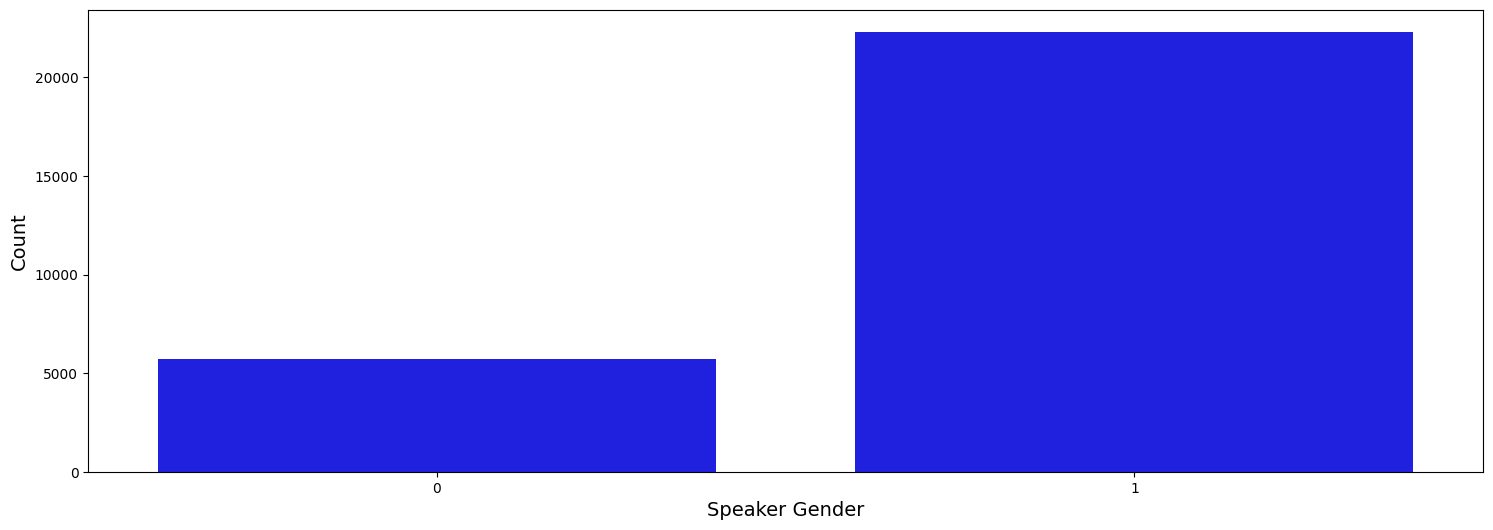

In [17]:
plt.figure(figsize=(18, 6))
sn.countplot(data=y_train, x='label_3',color = 'blue')
plt.xlabel('Speaker Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [ ]:
best_model_label_3 = svm.SVC(C=100, gamma=0.01, kernel='rbf',degree=4)
best_model_label_3.fit(x_train,y_train[L3])

In [ ]:
label_3_predict_valid_before_feature_engineering = best_model_label_3.predict(x_valid)
label_3_predict_test_before_feature_engineering = best_model_label_3.predict(x_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_valid[L3],label_3_predict_valid_before_feature_engineering))

In [18]:
pca = PCA(n_components=0.96,svd_solver='full')
x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

x_traing_trf = pd.DataFrame(x_train_pca)
x_valid_trf = pd.DataFrame(x_valid_pca)
x_test_trf = pd.DataFrame(x_test_pca)

In [ ]:
accuracy_svc = cross_val_score(svm.SVC(C=10, gamma=0.01, kernel='linear',degree=3), x_train, y_train[L3], cv=3).mean()

In [ ]:
accuracy_svc

In [22]:
best_model_label_3 = svm.SVC(C=10, gamma=0.01, kernel='linear',degree=3)
best_model_label_3.fit(x_traing_trf,y_train[L3])

label_3_predict_valid_after_feature_engineering = best_model_label_3.predict(x_valid_trf)
label_3_predict_test_after_feature_engineering = best_model_label_3.predict(x_test_trf)
print("Accuracy :",metrics.accuracy_score(y_valid[L3],label_3_predict_valid_after_feature_engineering))

Accuracy : 0.9972826086956522


In [19]:
# Hyperparameter Tuning - Random Grid Search
randomizedSearch(svm.SVC(),x_train_pca,y_train[L3])

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 10}
0.9711483594864478


# **Label 4**

Text(0, 0.5, 'Count')

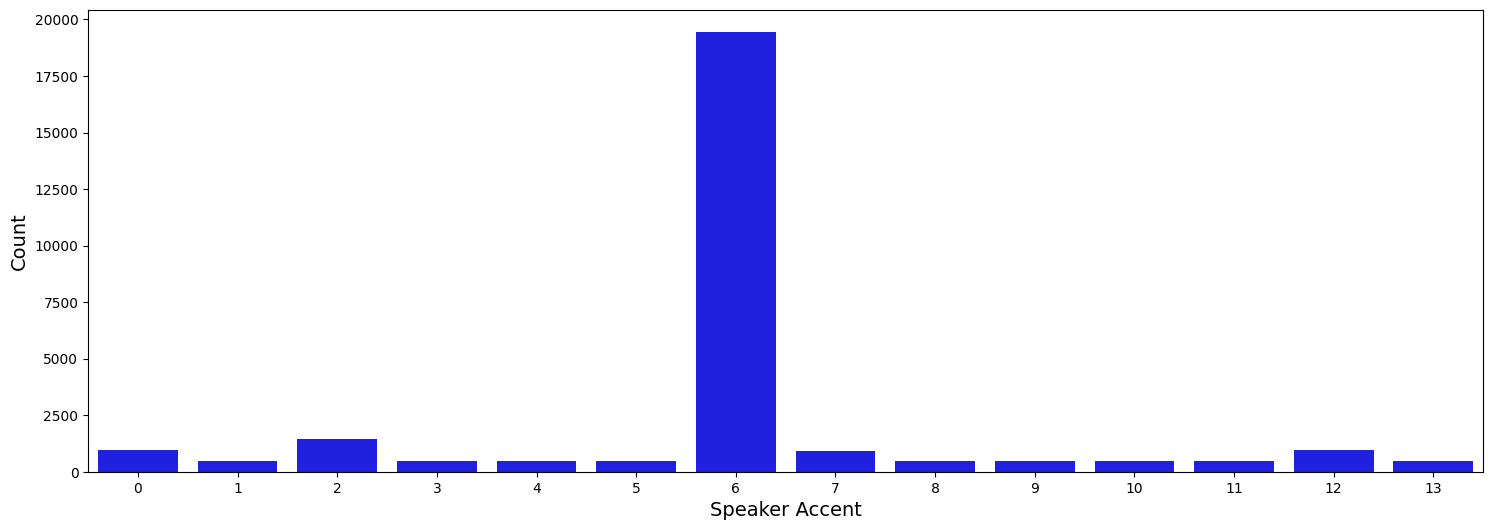

In [24]:
plt.figure(figsize=(18, 6))
sn.countplot(data=y_train, x='label_4',color = 'blue')
plt.xlabel('Speaker Accent',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [ ]:
best_model_label_4 = svm.SVC(C=10, gamma=0.01, kernel='rbf',degree=4)
best_model_label_4.fit(x_train,y_train[L4])

In [ ]:
label_4_predict_valid_before_feature_engineering = best_model_label_4.predict(x_valid)
label_4_predict_Test_before_feature_engineering = best_model_label_4.predict(x_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_valid[L2],label_4_predict_valid_before_feature_engineering))

In [26]:
def correlation(dataset, threshold=0.6):
    col_correlation = set()
    correlation_matrix = dataset.corr()
    for i in range (len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                colname = correlation_matrix.columns[i]
                col_correlation.add(colname)
    return col_correlation

In [27]:
corr_features = correlation(x_train)
x_train = x_train.drop(columns=list(corr_features))
x_valid = x_valid.drop(columns=list(corr_features))
x_test  = x_test.drop(columns=list(corr_features))

In [28]:
ros = RandomOverSampler(random_state=0)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train[L4])

In [29]:
n_components = 0.96
pca = PCA(n_components=n_components,svd_solver='full')

x_train_pca = pca.fit_transform(x_train_resampled)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

In [ ]:
accuracy_svc = cross_val_score(svm.SVC(C=10, gamma=0.01, kernel='rbf',degree=4), x_train, y_train[L3], cv=3).mean()

In [32]:
best_model_label_4 = svm.SVC(C=100, gamma=0.01, kernel='rbf',degree=4)
best_model_label_4.fit(x_traing_trf,y_train[L4])

label_4_predict_valid_after_feature_engineering = best_model_label_4.predict(x_valid_trf)
label_4_predict_test_after_feature_engineering = best_model_label_4.predict(x_test_trf)
print("Accuracy :",metrics.accuracy_score(y_valid[L4],label_4_predict_valid_after_feature_engineering))

Accuracy : 0.9524456521739131


In [ ]:
# Hyperparameter Tuning - Random Grid Search
randomizedSearch(svm.SVC(),x_train_resampled,y_train_resampled)

In [36]:
# Label 1
pred_l1 = label_1_predict_test_after_feature_engineering
# Label 2
pred_l2 = label_2_predict_test_after_feature_engineering
# Label 3
pred_l3 = label_3_predict_test_after_feature_engineering
# Label 4
pred_l4 = label_4_predict_test_after_feature_engineering

In [37]:
id_list = test_data['ID']

result = {
    'ID': id_list,
    'label_1': pred_l1,
    'label_2': pred_l2,
    'label_3': pred_l3,
    'label_4': pred_l4
}

result_df = pd.DataFrame(result)

result_df.to_csv('layer_9.csv', index=False)